# Introduction to convolutional neural networks and computer vision with TensorFlow and Keras
# https://www.tensorflow.org/tutorials/images/cnn

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. It is a subfield of Artificial Intelligence (AI) and Machine Learning (ML) which focuses on enabling computers to see, identify and process images in a way similar to humans. Convolutional Neural Networks (CNNs) are a class of deep learning models that have proven highly effective for image classification tasks.

## get the data

The image we're working wisth are from the Food-101 dataset. It contains 101 different food categories with 101,000 images. You can find the full dataset on [Kaggle](https://www.kaggle.com/dansbecker/food-101). However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with a smaller dataset so we can experiment quickly. Later on we'll see how to scale this up to larger datasets.

```python
# Download the data (you can also download it manually from Kaggle if you want to see the full dataset)

In [1]:
import os
os.getcwd()

'c:\\Project_1'

In [2]:
# ========================
# 🚀 CONFIGURAÇÃO RÁPIDA
# ========================
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"TensorFlow {tf.__version__} - Geekom A9 Max")
devices = tf.config.list_physical_devices()
for d in devices:
    print(f"✅ {d.device_type.upper()}: {d.name}")

# Configurar gráficos
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

print("✅ Notebook configurado!")

TensorFlow 2.13.0 - Geekom A9 Max
✅ CPU: /physical_device:CPU:0
✅ Notebook configurado!


In [3]:
# 📈 MONITOR DE PERFORMANCE
import time
from IPython.display import clear_output

class PerformanceMonitor:
    def __init__(self):
        self.start_time = None
        self.batch_times = []
    
    def start_epoch(self):
        self.start_time = time.time()
        self.batch_times = []
    
    def record_batch(self, batch_num, total_batches):
        elapsed = time.time() - self.start_time
        self.batch_times.append(elapsed)
        
        if batch_num % 10 == 0:
            avg_time = np.mean(self.batch_times[-10:]) if len(self.batch_times) >= 10 else elapsed
            eta = avg_time * (total_batches - batch_num)
            
            clear_output(wait=True)
            print(f"Batch {batch_num}/{total_batches}")
            print(f"Tempo/batch: {avg_time:.3f}s")
            print(f"ETA: {eta/60:.1f} minutos")
            print("-" * 40)

# Usar:
monitor = PerformanceMonitor()

In [4]:
#import zipfile
#import urllib.request

# Baixar o arquivo ZIP
#url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
#zip_path = "pizza_steak.zip"
#urllib.request.urlretrieve(url, zip_path)

# # Descompactar o arquivo ZIP
#with zipfile.ZipFile(zip_path, "r") as zip_ref:
#    zip_ref.extractall()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is to become one with the data. This means understanding the data, its structure, and its characteristics. This step is crucial because it helps in making informed decisions about data preprocessing, model selection, and evaluation metrics.

```python

In [5]:
%ls pizza_steak


 Volume in drive C is Windows
 Volume Serial Number is C0D6-6CAD

 Directory of c:\Project_1\pizza_steak

10/01/2026  16:23    <DIR>          .
10/01/2026  17:29    <DIR>          ..
10/01/2026  16:23    <DIR>          test
10/01/2026  16:23    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  1,376,359,391,232 bytes free


In [6]:
!dir pizza_steak\train\


 Volume in drive C is Windows
 Volume Serial Number is C0D6-6CAD

 Directory of c:\Project_1\pizza_steak\train

10/01/2026  16:23    <DIR>          .
10/01/2026  16:23    <DIR>          ..
10/01/2026  16:23    <DIR>          pizza
10/01/2026  16:23    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  1,376,359,391,232 bytes free


In [7]:
!dir pizza_steak\train\pizza

 Volume in drive C is Windows
 Volume Serial Number is C0D6-6CAD

 Directory of c:\Project_1\pizza_steak\train\pizza

10/01/2026  16:23    <DIR>          .
10/01/2026  16:23    <DIR>          ..
10/01/2026  16:23            45,555 1008104.jpg
10/01/2026  16:23            55,042 1008144.jpg
10/01/2026  16:23            48,090 1008844.jpg
10/01/2026  16:23            44,492 1008941.jpg
10/01/2026  16:23           118,923 1011404.jpg
10/01/2026  16:23            52,687 102037.jpg
10/01/2026  16:23            47,401 1026922.jpg
10/01/2026  16:23            76,126 1029698.jpg
10/01/2026  16:23            57,669 1033251.jpg
10/01/2026  16:23            64,285 1035854.jpg
10/01/2026  16:23            35,744 1038357.jpg
10/01/2026  16:23            51,637 1040878.jpg
10/01/2026  16:23            48,281 1044524.jpg
10/01/2026  16:23            64,412 1044789.jpg
10/01/2026  16:23            41,408 1047561.jpg
10/01/2026  16:23            38,317 1048649.jpg
10/01/2026  16:23            27,132 10

In [8]:
import os as os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [9]:
!dir /a pizza_steak

 Volume in drive C is Windows
 Volume Serial Number is C0D6-6CAD

 Directory of c:\Project_1\pizza_steak

10/01/2026  16:23    <DIR>          .
10/01/2026  17:29    <DIR>          ..
10/01/2026  16:23    <DIR>          test
10/01/2026  16:23    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  1,376,359,387,136 bytes free


In [10]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise our images, first lets get the class names programmatically

In [11]:
# get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [12]:
# lets visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir, target_class):
    #Set up the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1) # list of random images
    print(random_image)

    #read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
 # show the shape of the image
    print(f"Image type: {type(img)}")
    print(f"Image shape: {img.shape}")
    print(f"Image min value: {np.min(img)}")
    print(f"Image max value: {np.max(img)}")

    return img

['3441394.jpg']
Image type: <class 'numpy.ndarray'>
Image shape: (512, 512, 3)
Image min value: 0
Image max value: 255


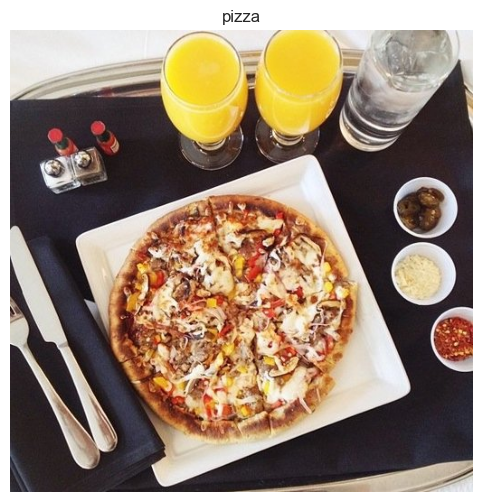

In [13]:
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [14]:
img

array([[[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [236, 239, 244],
        [237, 241, 244],
        [234, 238, 241]],

       [[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [235, 238, 243],
        [235, 239, 242],
        [233, 237, 240]],

       [[233, 232, 230],
        [232, 231, 229],
        [232, 231, 229],
        ...,
        [236, 237, 241],
        [236, 237, 241],
        [234, 235, 239]],

       ...,

       [[ 59,  58,  64],
        [ 53,  52,  58],
        [ 52,  51,  57],
        ...,
        [228, 233, 239],
        [227, 232, 238],
        [226, 231, 237]],

       [[ 63,  62,  68],
        [ 53,  52,  58],
        [ 50,  49,  55],
        ...,
        [228, 233, 237],
        [229, 234, 238],
        [227, 232, 236]],

       [[ 68,  67,  73],
        [ 55,  54,  60],
        [ 51,  50,  56],
        ...,
        [228, 233, 237],
        [231, 236, 240],
        [227, 232, 236]]

In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [236, 239, 244],
        [237, 241, 244],
        [234, 238, 241]],

       [[234, 233, 231],
        [233, 232, 230],
        [231, 230, 228],
        ...,
        [235, 238, 243],
        [235, 239, 242],
        [233, 237, 240]],

       [[233, 232, 230],
        [232, 231, 229],
        [232, 231, 229],
        ...,
        [236, 237, 241],
        [236, 237, 241],
        [234, 235, 239]],

       ...,

       [[ 59,  58,  64],
        [ 53,  52,  58],
        [ 52,  51,  57],
        ...,
        [228, 233, 239],
        [227, 232, 238],
        [226, 231, 237]],

       [[ 63,  62,  68],
        [ 53,  52,  58],
        [ 50,  49,  55],
        ...,
        [228, 233, 237],
        [229, 234, 238],
        [227, 232, 236]],

       [[ 68,  67,  73],
        [ 55,  54,  60],
        [ 51,  50,  56],
        ...,
        [228, 233, 23

In [16]:
# View image shape
img.shape  # should be (height, width, color_channels)

(512, 512, 3)

In [17]:
# get all the pixel values between 0 and 1
img = img / 255.0 #normalization or scaling
img

array([[[0.91764706, 0.91372549, 0.90588235],
        [0.91372549, 0.90980392, 0.90196078],
        [0.90588235, 0.90196078, 0.89411765],
        ...,
        [0.9254902 , 0.9372549 , 0.95686275],
        [0.92941176, 0.94509804, 0.95686275],
        [0.91764706, 0.93333333, 0.94509804]],

       [[0.91764706, 0.91372549, 0.90588235],
        [0.91372549, 0.90980392, 0.90196078],
        [0.90588235, 0.90196078, 0.89411765],
        ...,
        [0.92156863, 0.93333333, 0.95294118],
        [0.92156863, 0.9372549 , 0.94901961],
        [0.91372549, 0.92941176, 0.94117647]],

       [[0.91372549, 0.90980392, 0.90196078],
        [0.90980392, 0.90588235, 0.89803922],
        [0.90980392, 0.90588235, 0.89803922],
        ...,
        [0.9254902 , 0.92941176, 0.94509804],
        [0.9254902 , 0.92941176, 0.94509804],
        [0.91764706, 0.92156863, 0.9372549 ]],

       ...,

       [[0.23137255, 0.22745098, 0.25098039],
        [0.20784314, 0.20392157, 0.22745098],
        [0.20392157, 0

"Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)."

## An end-to-end example

Lets build a convolutional neural network to find patterns in our images, more specifically we need a way to do:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNNN to our training data


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6756 - accuracy: 0.5533 - val_loss: 0.6404 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 0.5609 - accuracy: 0.7093 - val_loss: 0.4445 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4293 - accuracy: 0.8140 - val_loss: 0.3754 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3798 - accuracy: 0.8333 - val_loss: 0.3064 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3191 - accuracy: 0.8700 - val_loss: 0.3194 - val_accuracy: 0.8720


In [19]:
from multiprocessing import pool
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess the data (get all of the pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir  = "C:\\Project_1\\Tensorflow-1\\pizza_steak\\train"
test_dir = "C:\\Project_1\\Tensorflow-1\\pizza_steak\\test"

#Import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = 
    train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = 
    test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding= "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy", 
                optimizer = "adam", 
                metrics = ["accuracy"])
#Fit our model
history_1 = model_1.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data), 
                        validation_data = (valid_data),
                        validation_steps = len(valid_data))
                        

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 155ms/step - loss: 0.6195 - accuracy: 0.6653 - val_loss: 0.5142 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4627 - accuracy: 0.7920 - val_loss: 0.3860 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4172 - accuracy: 0.8207 - val_loss: 0.3433 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3719 - accuracy: 0.8480 - val_loss: 0.3809 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3215 - accuracy: 0.8693 - val_loss: 0.3536 - val_accuracy: 0.8680


In [20]:
# get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

### Using the same model as before

Lets replicate the model we've built in a previous section to see if it works with our image data.
the model we're building is from the tensorflow playground: [https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35726&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]


In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensoflow playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 88ms/step - loss: 0.6217 - accuracy: 0.7093 - val_loss: 0.4820 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.4969 - accuracy: 0.7700 - val_loss: 0.4688 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 5s 97ms/step - loss: 0.4955 - accuracy: 0.7653 - val_loss: 0.6290 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 4s 87ms/step - loss: 0.4608 - accuracy: 0.7907 - val_loss: 0.4413 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 4s 91ms/step - loss: 0.4563 - accuracy: 0.7860 - val_loss: 0.4389 - val_accuracy: 0.7880


In [22]:
# get a model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN model (model_1), model_2 performs terribly... let's try

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensoflow playground model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 133ms/step - loss: 3.5127 - accuracy: 0.6333 - val_loss: 0.9847 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.9297 - accuracy: 0.6807 - val_loss: 1.5931 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.8999 - accuracy: 0.7027 - val_loss: 0.4984 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5183 - accuracy: 0.7707 - val_loss: 0.5688 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.5881 - accuracy: 0.7467 - val_loss: 0.4776 - val_accuracy: 0.7880


In [24]:
# get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note: you can think of trainable parameters as patterns a model learns from data. intuitively, the more trainable parameters a model has, the more patterns it can learn. intuitively, this should lead to better performance, however, too many trainable parameters can lead to overfitting. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the differences here is the two different styles of model we're using. Where a series of a dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a ***convolutional neural network seeks to sort out and learn the most important patterns in an image***. So even though these are less learnable paramenters in our convolutional neural network, these are often more helpful in dechiphering between different ***features*** in an image. 

## Binary classification evaluation metrics - lets break it down

1. Become one with the data (visualize, visualize, vizualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling / normalizing & turning our data into batches)
3. Create a model( start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


## 1. Become one with the data

['740090.jpg']
Image type: <class 'numpy.ndarray'>
Image shape: (512, 512, 3)
Image min value: 0
Image max value: 255
['1289139.jpg']
Image type: <class 'numpy.ndarray'>
Image shape: (512, 512, 3)
Image min value: 0
Image max value: 255


<module 'matplotlib.pyplot' from 'c:\\Project_1\\ml_win\\lib\\site-packages\\matplotlib\\pyplot.py'>

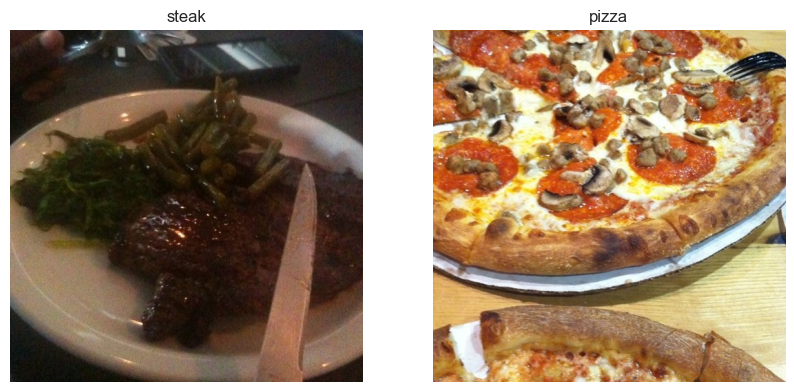

In [25]:
# Visualize data
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")
plt



### 2 2. Preprocess the data""" (prepare for a model)

In [26]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### Our nest step is to turn our data into **batches**.

A batch is a group of images that are processed together. This allows us to train the model on multiple. rather than look at all ~10,000 images at one time, a model might only look at 32 at a time. It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well

Why 32?
Because it's a common batch size used by many machine learning models. It's also a good balance


In [27]:
# Create train and test data generators and rescale the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [28]:
# Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of the images
                                               batch_size=32, # size of minibatches to load data into
                                                  target_size=(224, 224), # resize all images to 224 x 224
                                                    class_mode="binary", # type of data you're working with
                                                    seed=42)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,    
                                                target_size=(224, 224),
                                                  class_mode="binary",
                                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# get a sample of the train data batch
images, labels = next(train_data) # get next batch of images and labels in train_data
len(images), len(labels)

(32, 32)

In [30]:
# How manybatches are there?
len(train_data), len(test_data) #1500/22=75, 500/32=15.625~16 

(47, 16)

In [31]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [32]:
images[7].shape # 

(224, 224, 3)

In [33]:
# View the firts batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3' Create a CNN model to classify pizza vs steak images (start with a baseline)

A baseline is a relatively simpple model or existing result that you setup when beginning a machine learning project and then as you keep experimenting, you compare your results against them to see if you have improved upon them. Baselines are often used as a starting point for more complex models and can serve

**Note** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data an then introduce complexity as required (e.g. look at wich current model is performing best in the filed for  your problem).


In [34]:
# Make the creating of our model a little easier by defining constants
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (this will be our baseline, a layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10, # filter is the number  of sliding windows going accross an input (higher=more complex models)
           kernel_size=(3, 3), # the size of the sliding window going accross the input
           strides=1, # the size of the step the sliding window takes accross an input
           padding='same',  # if "same", output shape is same as input shape, if "valid", outputs shapes get compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify the input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')  # output layer (working on a binary classification problem)
    ])


In [36]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
# get a summary of model_4
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 484000)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486101 (1.85 MB)
Trainable params: 486101 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [38]:
# Check the lenght of training and test data generators
len(train_data), len(test_data)


(47, 16)

In [39]:
# Fit the model
history_4 = model_4.fit(train_data, # this is the combination of labels and sample data
                        epochs=5, # number of times to repeat the training process over all batches in the dataset
                        steps_per_epoch=len(train_data), # number of batches per epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6982 - accuracy: 0.6960 - val_loss: 0.4372 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3619 - accuracy: 0.8447 - val_loss: 0.3674 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.2190 - accuracy: 0.9233 - val_loss: 0.4518 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0943 - accuracy: 0.9753 - val_loss: 0.4133 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.0333 - accuracy: 0.9933 - val_loss: 0.4360 - val_accuracy: 0.8020


## 5 Evaluate the model on the test data

It looks like our model is learning something, let's evaluate it.

<Axes: >

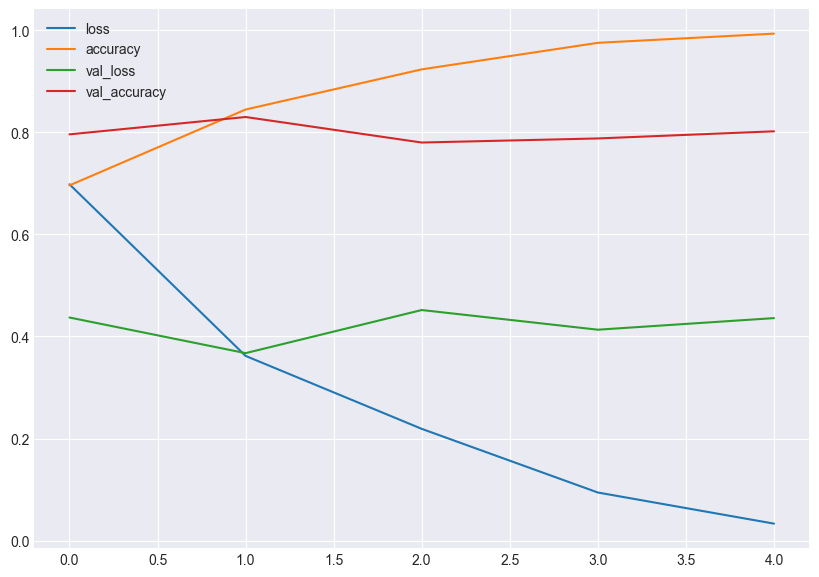

In [40]:
import pandas as pd
# Convert the history object into a pandas DataFrame
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [41]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))  # how many epochs did we run for?
    
    plt.figure(figsize=(15, 7))
    # Plot loss
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')   
    plt.plot(epochs, val_loss, label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    # Plot accuracy
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='validation_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

**Note:** When a model's **validation loss starts to increase**, it's likely that model is **overfitting** the trainning dataset. this means, itsthe model has learned the training data **too well** and thus the model's ability to generalize to unseen data will be diminished.

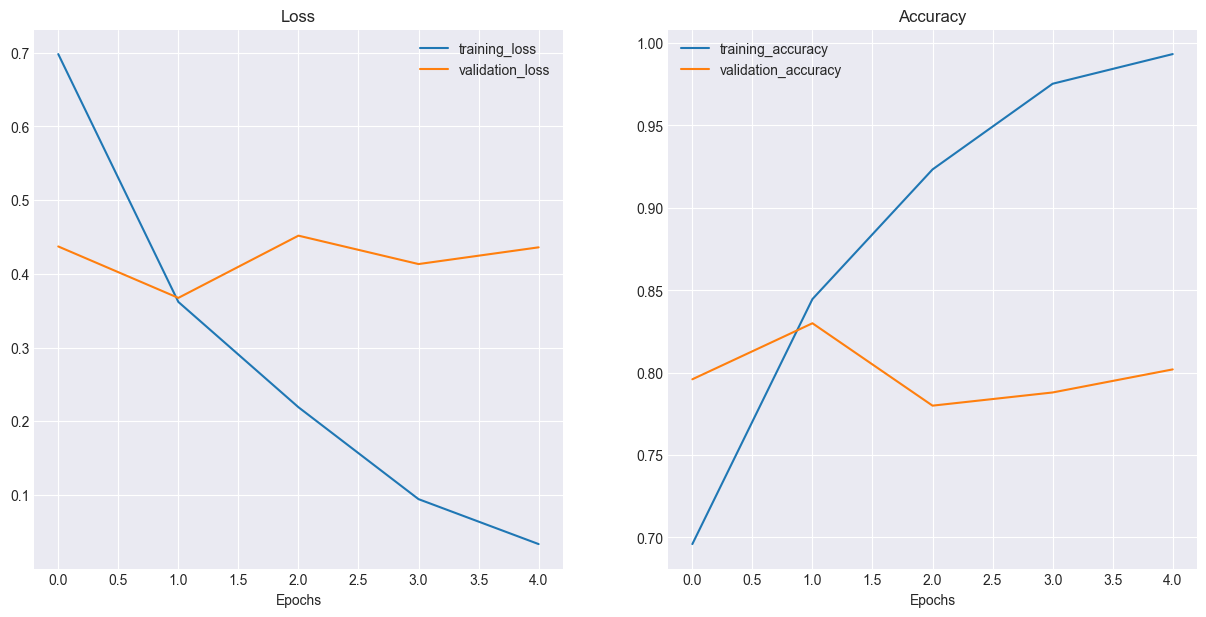

In [42]:
# Check out our loss curves and accuracy curves
plot_loss_curves(history_4)

### 6. adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline
2. reduce overfitting

Ways to induce  overfitting: 

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add mode data...


**Note:** reducing oferfiting is also know as **regularization**



In [43]:
# Create the  model (this is going to be our baseline, a layer convolutional neural network
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [44]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [45]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 113ms/step - loss: 0.5887 - accuracy: 0.6807 - val_loss: 0.4479 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.4749 - accuracy: 0.7813 - val_loss: 0.3941 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4406 - accuracy: 0.7967 - val_loss: 0.3895 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4109 - accuracy: 0.8200 - val_loss: 0.3389 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 100ms/step - loss: 0.3986 - accuracy: 0.8280 - val_loss: 0.3220 - val_accuracy: 0.8600


In [46]:
# get a summary of model_5
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

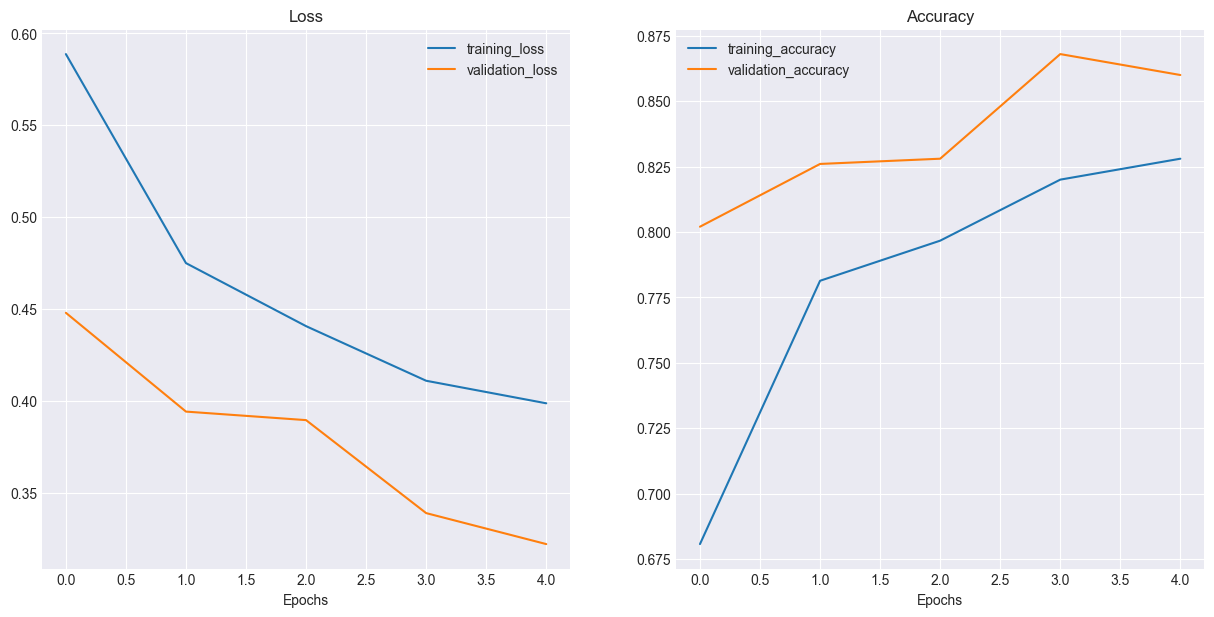

In [47]:
# Plot the loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation techniques

In [48]:
# Create ImageDataGenerator instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.3, # how much do you want to rotate an image
                                             shear_range=0.2, # shear angle in counter-clockwise direction
                                             zoom_range=0.2, #  zoom in and out
                                             width_shift_range=0.2, # move the image left or right
                                             height_shift_range=0.2, # move the image up and down
                                             horizontal_flip=True) # flip the image horizontally
                                             # vertical_flip=True) # flip the image vertically

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

#Create ImageDataGenerator without data augmentation for the test  dataset
test_datagen = ImageDataGenerator(rescale=1./255)


***Question***: What is data augmentation?
Data augmentation is the process of altering our training data, leading it ot have more diversity and it turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [49]:
# Import data and augment it from trainning directory
from random import shuffle


print("Augmented training data:")
train_datagen_augmented.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            shuffle=False) # For demonstration only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE  = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on the trainning set. Using ImageageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualiza some augmented data!!!

In [50]:
# get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_datagen_augmented.flow_from_directory(train_dir,
																						batch_size=32,
																						target_size=(224, 224),
																						class_mode="binary",
																						shuffle=False)) # note: labels aren't augmented... only data (images)


Found 1500 images belonging to 2 classes.


showing image number: 24


(-0.5, 223.5, 223.5, -0.5)

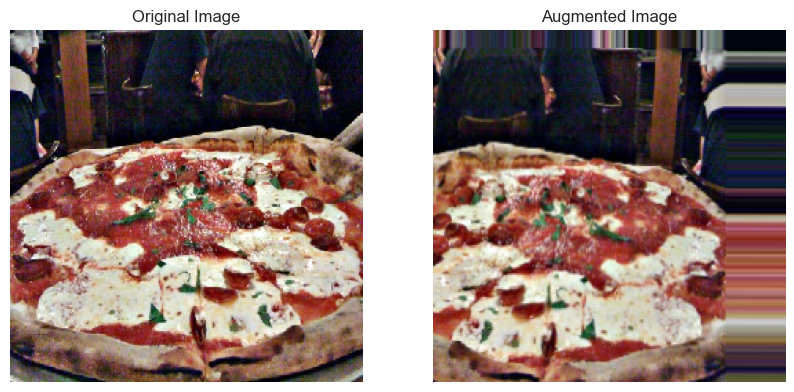

In [51]:
# Show original and augmented images
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis("off")


Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [52]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [53]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

Now we've seen whathat augmented training data looks like, let's build a model and see how it learns on augmented data

In [54]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') # binary classification model - pizza_imge vs steak_image
    ])
# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               batch_size=32,
                                                               target_size=(224, 224),
                                                               class_mode="binary",
                                                               seed=42)

history_6 = model_6.fit(train_data_augmented, # fitting on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))
                                                                    

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 244ms/step - loss: 0.6562 - accuracy: 0.5833 - val_loss: 0.6164 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5735 - accuracy: 0.7033 - val_loss: 0.3952 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 12s 251ms/step - loss: 0.4917 - accuracy: 0.7593 - val_loss: 0.3899 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4804 - accuracy: 0.7733 - val_loss: 0.3560 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4595 - accuracy: 0.7947 - val_loss: 0.3172 - val_accuracy: 0.8620


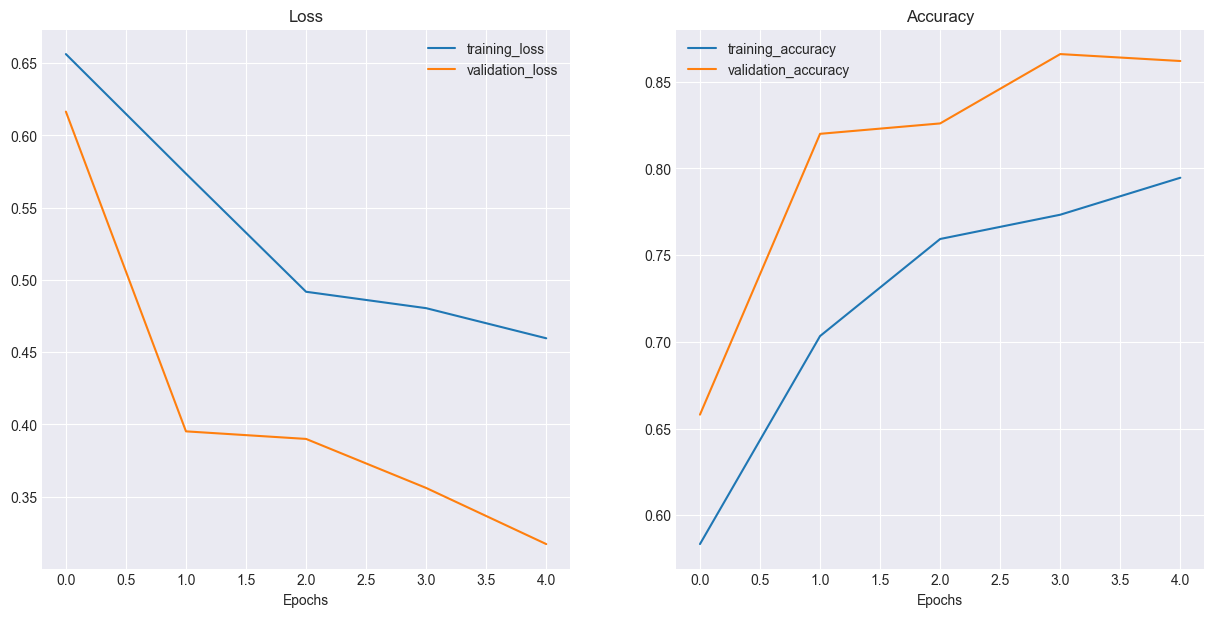

In [55]:
# Check our model training curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model (the same as before) on it and see what happens.

test

In [56]:
# Import data and augmented it and shuffle from trainning directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                               batch_size=32,
                                                               target_size=(224, 224),
                                                               class_mode="binary",
                                                               shuffle=True, #shuffle the data
                                                               seed=42)

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') # binary classification model - pizza_imge vs steak_image
    ])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  # fitting on augmented and shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6349 - accuracy: 0.6273 - val_loss: 0.4729 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.5295 - accuracy: 0.7333 - val_loss: 0.3950 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4789 - accuracy: 0.7767 - val_loss: 0.3577 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4591 - accuracy: 0.7767 - val_loss: 0.3662 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4530 - accuracy: 0.7893 - val_loss: 0.3554 - val_accuracy: 0.8380


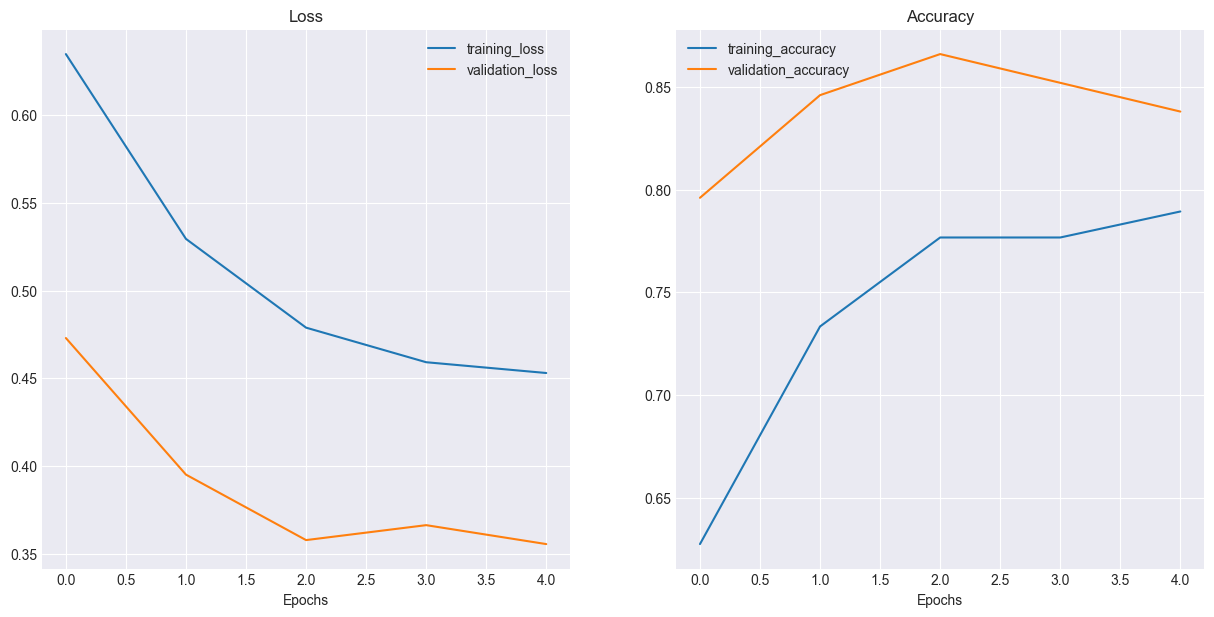

In [58]:
#Plot the loss curves
plot_loss_curves(history_7)

In [59]:
help(shuffle)

Help on method shuffle in module random:

shuffle(x, random=None) method of random.Random instance
    Shuffle list x in place, and return None.
    
    Optional argument random is a 0-argument function returning a
    random float in [0.0, 1.0); if it is the default None, the
    standard random.random will be used.



**Note** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. repeat until satisfied

Since we've already beatem our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more 'Conv2D' / 'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [60]:
# Classes we're working on it
print(class_names)

['pizza' 'steak']


In [61]:
!curl -L -o 03-steak.jpeg https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 1931k  100 1931k    0     0  1986k      0 --:--:-- --:--:-- --:--:-- 1986k


(-0.5, 3023.5, 4031.5, -0.5)

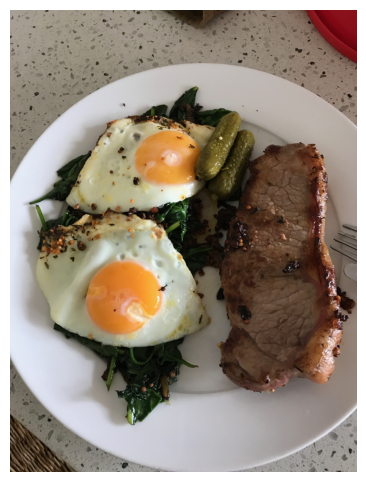

In [62]:
import matplotlib.image as npimg
import matplotlib.pyplot as plt
steak = npimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [63]:
# Check the shape of our steak image
steak.shape

(4032, 3024, 3)

> **Note:** When you a train a neural network and you want to make prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [64]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the image into a tensor
    img = tf.image.decode_image(img) # by default it decodes to a tensor with dtype=tf.uint8

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape]) # default method is bilinear
    
    # Return the normalized image (pixel values between 0 and 1)
    return img / 255.

In [65]:
# Load in and prep the image
steak = load_and_prep_image("03-steak.jpeg") # 
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
pred = model_7.predict(tf.expand_dims(steak, axis=0)) # Add a batch dimension to our image

1/1 [==============================] - 0s 64ms/step


In [67]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [68]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

> Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, would't it be nice if we could visualize the image as well as the model's prediction?

In [69]:
# Remind ourselves of the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
# We can index the prediction probabilities to get the class name
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [71]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
      and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 16ms/step


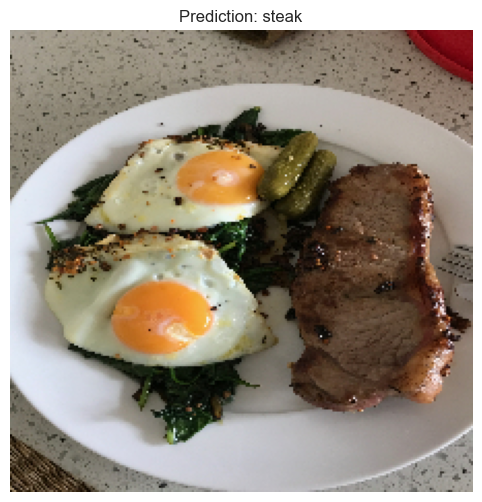

In [72]:
# test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names=class_names)

> **Our model works!!" Let's try it on another image.... this time pizza**

1/1 [==============================] - 0s 14ms/step


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2807k  100 2807k    0     0  6849k      0 --:--:-- --:--:-- --:--:-- 6881k


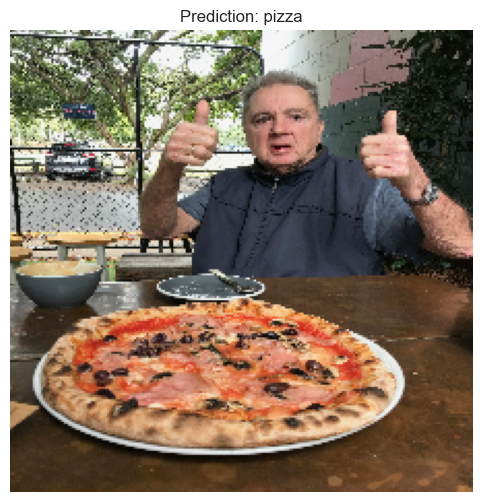

In [73]:
# Download an image of a pizza slice
!curl -L -o 03-pizza-dad.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multiclass Image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multiclass classification).

1. become one of the data
2. preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparamenters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the datasets

In [90]:
# import zipfile
# import urllib.request
# ## all the files are on food101 datasets/
# # Baixar o arquivo ZIP
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
# zip_path = "pizza_steak.zip"
# urllib.request.urlretrieve(url, zip_path)

# # Descompactar o arquivo ZIP
# with zipfile.ZipFile(zip_path, "r") as zip_ref:
#     zip_ref.extractall()

In [91]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [92]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [93]:
# let's get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['983402.jpg']
Image type: <class 'numpy.ndarray'>
Image shape: (494, 512, 3)
Image min value: 0
Image max value: 255


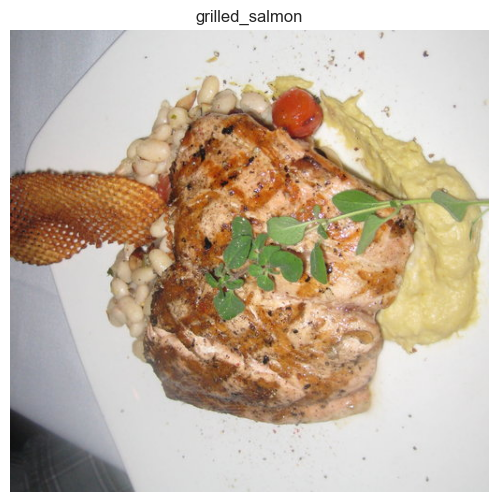

In [94]:
# Visualize, vizualise, vizualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [95]:
random.choice(class_names)

'fried_rice'

### 2. Preprocess the data (prepare it for a model)

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=32, # number of images to process at a time 
                                                  target_size=(224, 224), # convert all images to be 224 x 224
                                                  class_mode="categorical", # type of problem we're working on
                                                  seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website. How about we just take their model (also 10 classes) and use it fou our problem?

In [97]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create the model - similar to previous models but output layer changed for multi-class classification
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # output layer for multi-class classification (10 classes) and use the softmax activation function
    ])

# Compile the model
model_8.compile(loss='categorical_crossentropy', # loss function for multi-class classification
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [99]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 135ms/step - loss: 2.1464 - accuracy: 0.2223 - val_loss: 1.9831 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 1.8570 - accuracy: 0.3563 - val_loss: 1.9175 - val_accuracy: 0.3256
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.4114 - accuracy: 0.5256 - val_loss: 2.0696 - val_accuracy: 0.3000
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.7835 - accuracy: 0.7452 - val_loss: 2.5259 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.2581 - accuracy: 0.9223 - val_loss: 3.7308 - val_accuracy: 0.2904


In [98]:
len(train_data), len(test_data)

(235, 79)

### 5. Evaluate the model

In [100]:
# Evaluate on the test data
model_8.evaluate(test_data) 

79/79 [==============================] - 5s 65ms/step - loss: 3.7308 - accuracy: 0.2904


[3.7308011054992676, 0.2903999984264374]

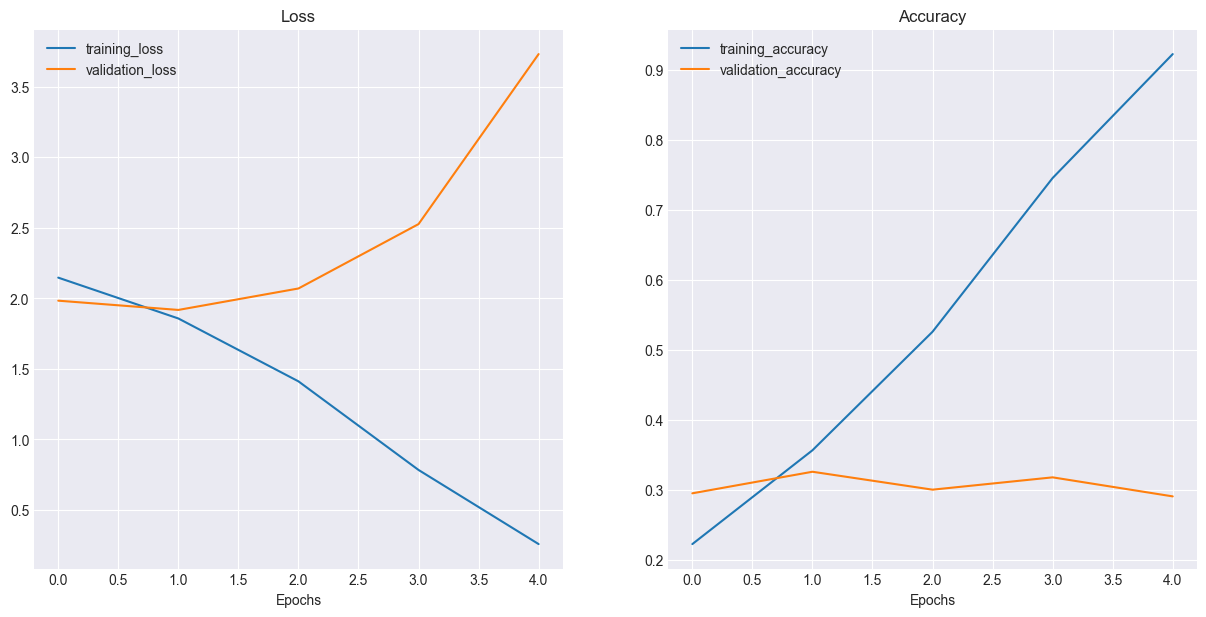

In [101]:
# Check the training curves
plot_loss_curves(history_8)

What do these loss cusrves tell us?

Well... it seems our model is **overfitting** the training set quite badly. In other words,it's getting great results on the trainning data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters to improve performance (to beat the baseline / reduce(overfitting)

Due to its performance on the trainning data, it's clear our model is learning something.

However it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by.

* **Get more data*** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - Data augmentation manipulates the trainning data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own data and allows you to use those patterns on your own data.

In [104]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [106]:
# How about we try and simplify the model first?
# let's try to remove 2 convolutional layers...

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # output layer for multi-class classification (10 classes) and use the softmax activation function
    ])
model_9.compile(loss='categorical_crossentropy', # loss function for multi-class classification
                optimizer=Adam(),
                metrics=['accuracy'])


In [107]:
# Fit the model with 2x xonvolutional layers removed

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 26s 107ms/step - loss: 2.1880 - accuracy: 0.2287 - val_loss: 2.0058 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 22s 94ms/step - loss: 1.7822 - accuracy: 0.3909 - val_loss: 1.9134 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 22s 92ms/step - loss: 1.4307 - accuracy: 0.5352 - val_loss: 1.9584 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 1.0019 - accuracy: 0.6831 - val_loss: 2.2233 - val_accuracy: 0.2828
Epoch 5/5
235/235 [==============================] - 21s 88ms/step - loss: 0.5957 - accuracy: 0.8268 - val_loss: 2.7039 - val_accuracy: 0.2900


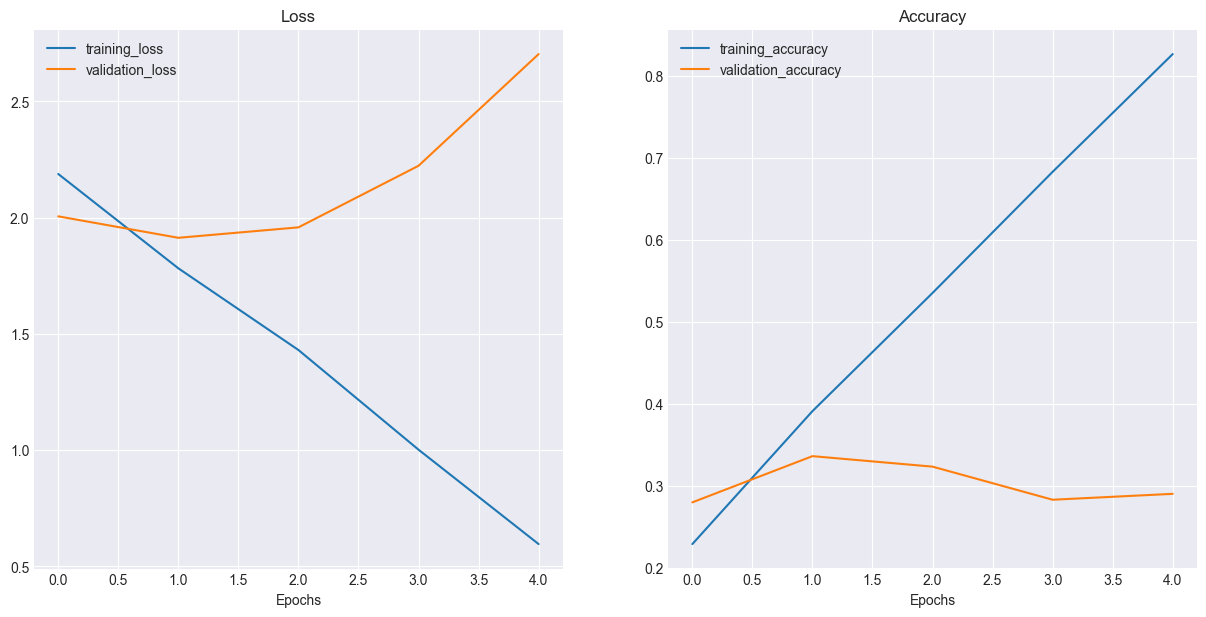

In [108]:
# Check out the loss curves
plot_loss_curves(history_9)

Looks like our "simplyfied" model (model_9) performed worse than our more complex model (model_8).
The overfitting continued....
How about we try data augmentation to see if that helps?


### Trying to reduce overfitting with data aumentation

Lets try and improve our model's results by using augmented training data.

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [110]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.3,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    batch_size=32,
                                                                    target_size=(224, 224),
                                                                    class_mode="categorical",
                                                                    seed=42)

Found 7500 images belonging to 10 classes.


In [111]:
# let's create another model but this time we'll fit it on the augmented training data of 10 food classes
model_10 = tf.keras.models.clone_model(model_8) # clone model_8 architecture

# Compile the model
model_10.compile(loss='categorical_crossentropy', # loss function for multi-class classification
                optimizer=Adam(),
                metrics=['accuracy'])

In [112]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [113]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [114]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 2.2091 - accuracy: 0.1732 - val_loss: 2.1135 - val_accuracy: 0.2244
Epoch 2/5
235/235 [==============================] - 67s 286ms/step - loss: 2.0762 - accuracy: 0.2481 - val_loss: 1.8965 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 78s 334ms/step - loss: 1.9874 - accuracy: 0.3048 - val_loss: 1.8981 - val_accuracy: 0.3432
Epoch 4/5
235/235 [==============================] - 78s 330ms/step - loss: 1.9339 - accuracy: 0.3263 - val_loss: 1.8405 - val_accuracy: 0.3652
Epoch 5/5
235/235 [==============================] - 56s 239ms/step - loss: 1.8952 - accuracy: 0.3432 - val_loss: 1.7697 - val_accuracy: 0.3804


In [115]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.7308 - accuracy: 0.2904


[3.7308011054992676, 0.2903999984264374]

In [116]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 1.7697 - accuracy: 0.3804


[1.7697304487228394, 0.38040000200271606]

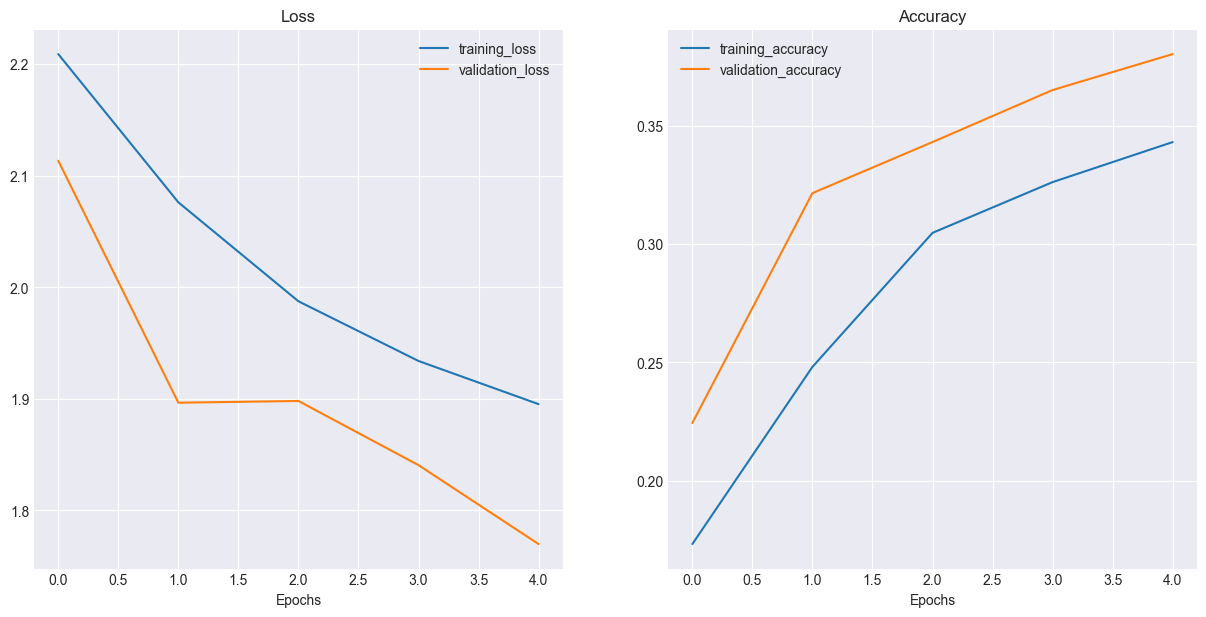

In [117]:
# Check out our model trained on augmented data training curves
plot_loss_curves(history_10)

Whoa! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... Continually trying to bring our loss curves closer toguether and trying to improve validation/test accuracy.

How?

By running lots of experiments, namelly:

* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5 epochs)
* try **transfer learning**

### Making a prediction with our training model

Let's use our traning model to make some predictions on our own custom images

In [120]:
# remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [134]:
# Download some custom images
!curl -L -o 03-sushi.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!curl -L -o 03-hamburger.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!curl -L -o 03-pizza-dad.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!curl -L -o 03-steak.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1684k  100 1684k    0     0  4153k      0 --:--:-- --:--:-- --:--:-- 4180k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 51 3480k   51 1786k    0     0  4182k      0 --:--:-- --:--:-- --:--:-- 4192k
100 3480k  100 3480k    0     0  6081k      0 --:--:-- --:--:-- --:--:-- 6095k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2807k  100 2807k    0     0  10.1M      0 --:

In [131]:
# reconfigure the prediction and plot function for multi-class classification
def pred_and_plot_multiclass(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
      and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add in logic to account for multiclass predicitions & get pred_class name
    if len(pred[0]) > 1: # check for multiclass
        # Get the predicted class index
        pred_class = class_names[tf.argmax(pred[0])]
    else: # binary classification
        pred_class = class_names[int(tf.round(pred)[0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 22ms/step


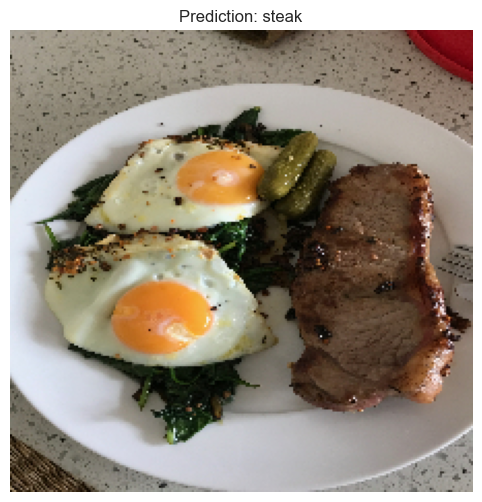

In [136]:
# make predictions on custom images with model_10
pred_and_plot_multiclass(model=model_10, 
              filename="03-steak.jpeg", 
              class_names=class_names)

### Saving and load your model

In [137]:
# Save a model
model_10.save("10_food_classes_model_10")

INFO:tensorflow:Assets written to: 10_food_classes_model_10\assets


INFO:tensorflow:Assets written to: 10_food_classes_model_10\assets


In [141]:
# load in a trained model and evaluate it
load_model_10 = tf.keras.models.load_model("10_food_classes_model_10")
load_model_10.evaluate(test_data)


79/79 [==============================] - 7s 84ms/step - loss: 1.7697 - accuracy: 0.3804


[1.7697306871414185, 0.38040000200271606]

In [ ]:
# Compare our model to our existing model
model_10.evaluate(test_data) 

79/79 [==============================] - 5s 65ms/step - loss: 1.7697 - accuracy: 0.3804


[1.769730806350708, 0.38040000200271606]

In [ ]:
##END